### Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Data Reading

In [7]:
df=pd.read_csv('exams.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
878,female,group C,bachelor's degree,standard,none,51,64,63
16,male,group B,high school,standard,none,58,47,42
724,male,group D,high school,free/reduced,completed,60,62,57
156,male,group B,high school,free/reduced,none,64,64,59
110,female,group C,some college,standard,completed,79,88,86


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.shape

(1000, 8)

In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
#renaming
df=df.rename(columns={"race/ethnicity":"race_ethnicity","parental level of education":"Education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})


### Data Visualisation

In [16]:
def bar_plot(variable):
    var=df[variable]
    varValue=var.value_counts()
    
    plt.figure(figsize=(5,5))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

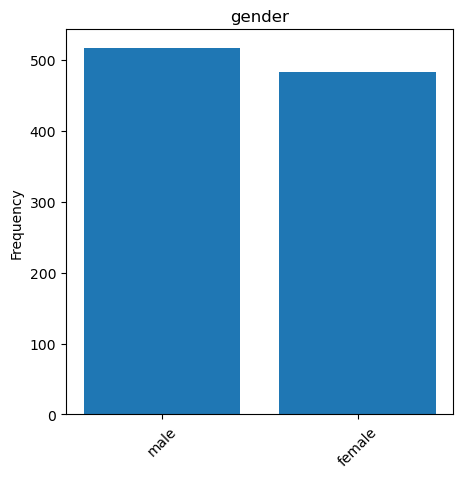

gender: 
 male      517
female    483
Name: gender, dtype: int64


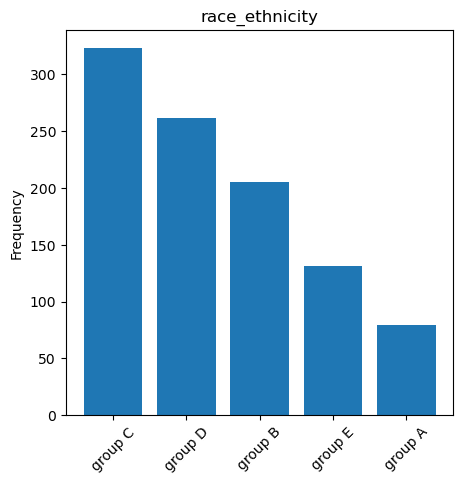

race_ethnicity: 
 group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64


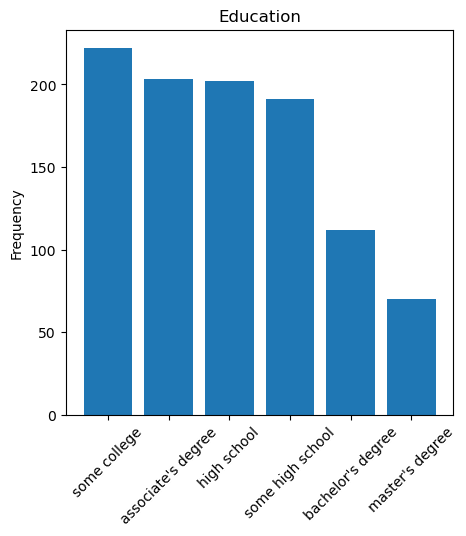

Education: 
 some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64


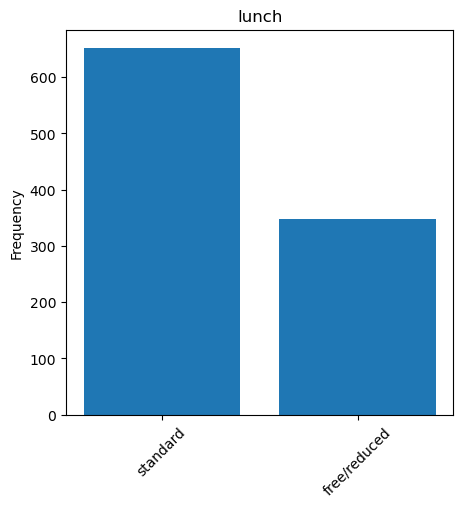

lunch: 
 standard        652
free/reduced    348
Name: lunch, dtype: int64


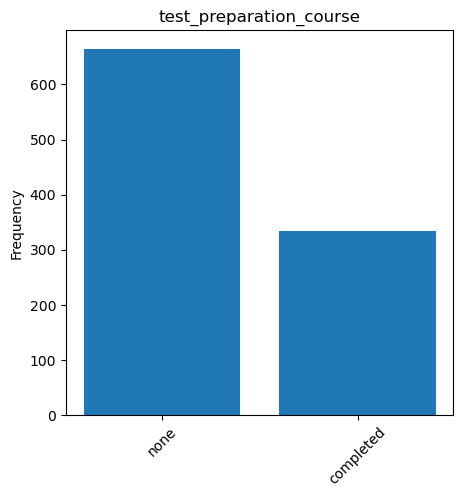

test_preparation_course: 
 none         665
completed    335
Name: test_preparation_course, dtype: int64


In [17]:
category1=["gender","race_ethnicity","Education","lunch","test_preparation_course"]

for c in category1:
    bar_plot(c)

In [18]:
df.race_ethnicity.value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64

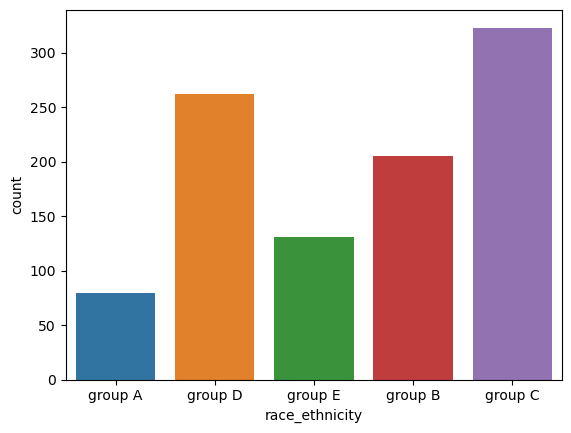

In [19]:
sns.countplot(data=df,x="race_ethnicity")
plt.show()

This graph indicates that there are more people in groupC

In [20]:

df[df.gender=="female"].race_ethnicity.value_counts(normalize=True)

group C    0.318841
group D    0.260870
group B    0.236025
group E    0.107660
group A    0.076605
Name: race_ethnicity, dtype: float64

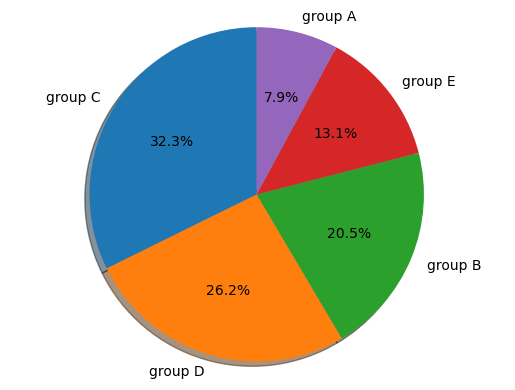

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df["race_ethnicity"].value_counts().index
sizes = df["race_ethnicity"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

This pie chart shows that there are more people in group C than others.

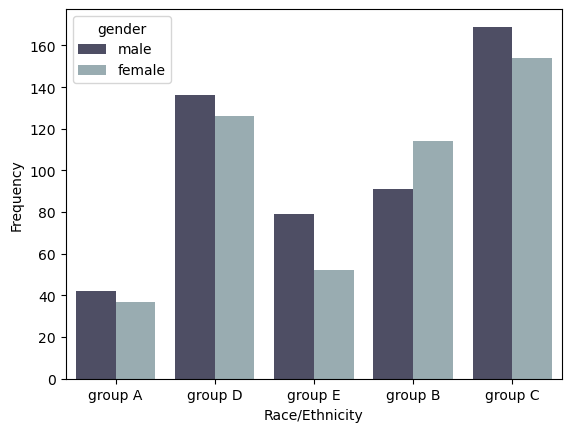

In [22]:
sns.countplot(x=df["race_ethnicity"], hue=df["gender"], palette="bone")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.show()

In [23]:
df[df.gender=="female"].race_ethnicity.value_counts()

group C    154
group D    126
group B    114
group E     52
group A     37
Name: race_ethnicity, dtype: int64

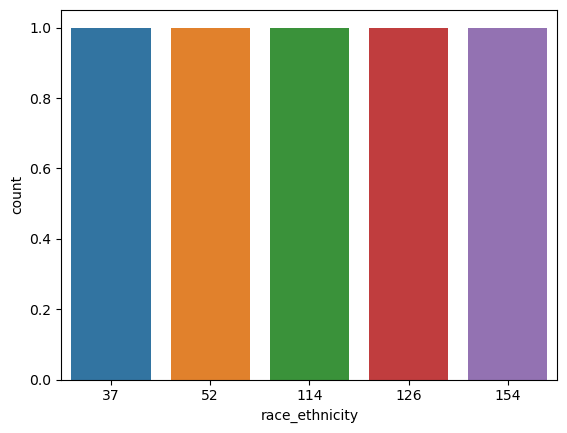

In [24]:
sns.countplot(data=df,x=df[df.gender=="female"].race_ethnicity.value_counts())
plt.show()

In [25]:
df.Education.value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64

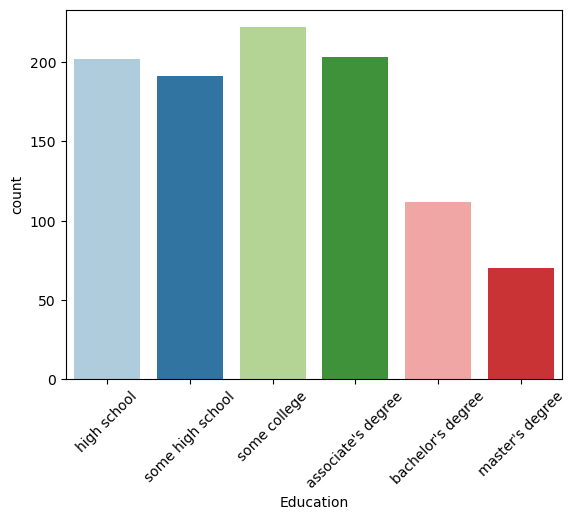

In [26]:
plt.xticks(rotation=45)
sns.countplot(data=df,x="Education",palette="Paired")
plt.show()

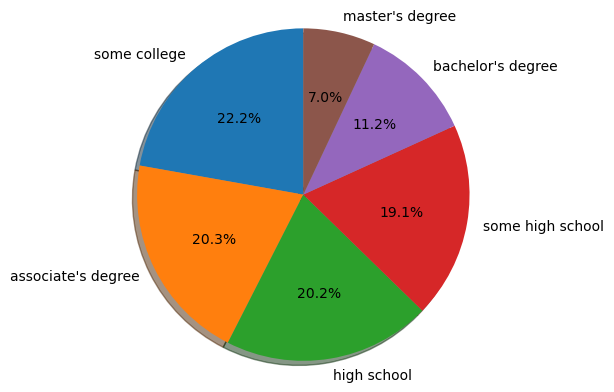

In [27]:
labels = df["Education"].value_counts().index
sizes = df["Education"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [28]:
df.gender.value_counts()

male      517
female    483
Name: gender, dtype: int64

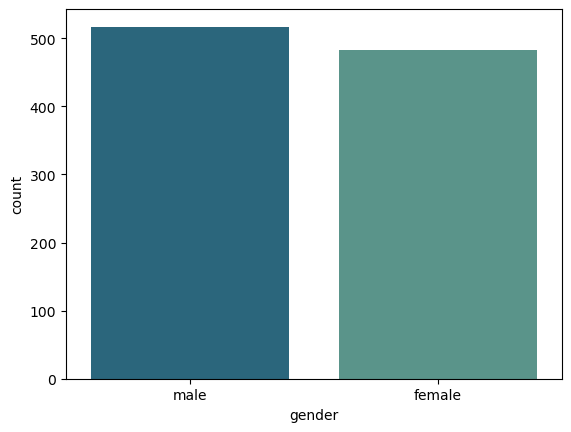

In [29]:
sns.countplot(data=df,x="gender",palette="crest_r")
plt.show()

In [30]:
df.lunch.value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

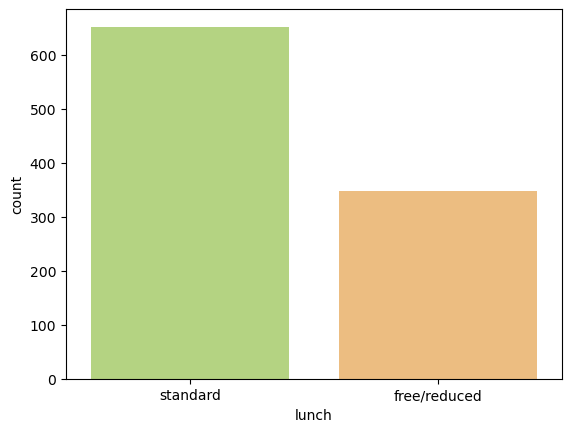

In [31]:
sns.countplot(data=df, x="lunch",palette="RdYlGn_r")
plt.show()

In [32]:
df.test_preparation_course.value_counts()

none         665
completed    335
Name: test_preparation_course, dtype: int64

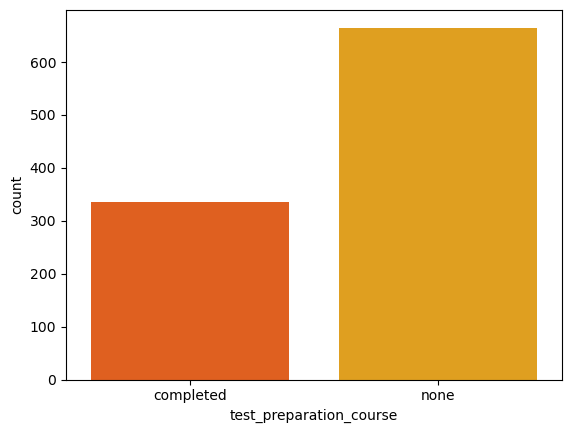

In [33]:
sns.countplot(data=df, x="test_preparation_course",palette="autumn")
plt.show()

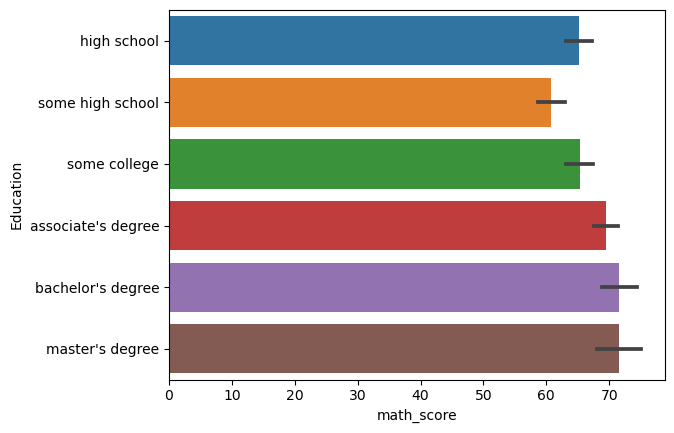

In [34]:
sns.barplot(data=df, x="math_score", y="Education")
plt.show()

### test_preparation_course-math_score
### test_preparation_course-reading_score
### test_preparation_course-writing_score

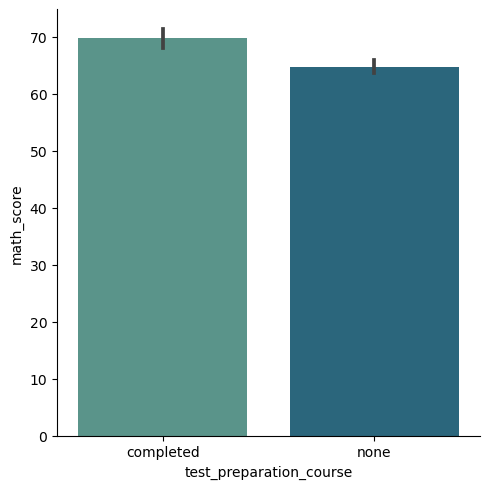

In [35]:
sns.catplot(data=df,x="test_preparation_course",y="math_score",kind="bar",palette="crest")
plt.show()

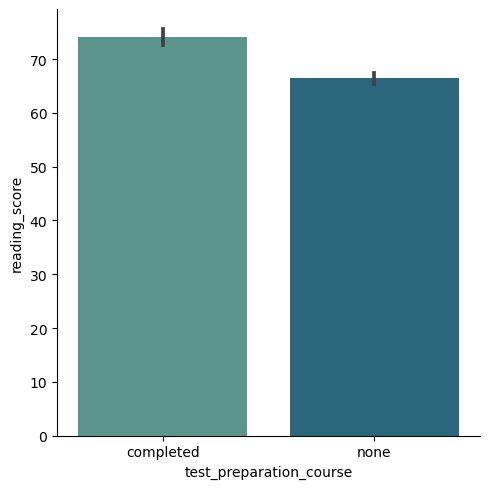

In [36]:
sns.catplot(data=df,x="test_preparation_course",y="reading_score",kind="bar",palette="crest")
plt.show()

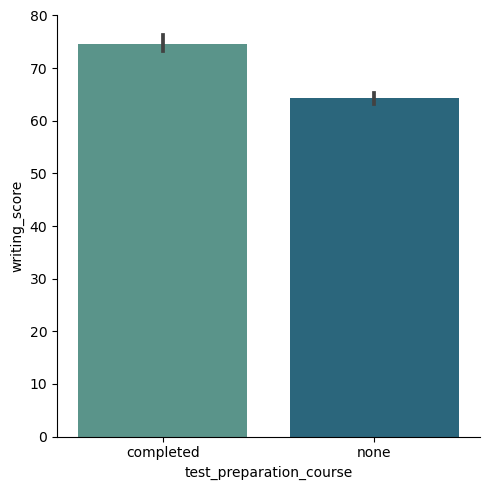

In [37]:
sns.catplot(data=df,x="test_preparation_course",y="writing_score",kind="bar",palette="crest")
plt.show()

From these tables we can conclude that the passing grade is about 70.

### Education-math_score
### Education-reading_score
### Education-writing_score

In [38]:
y=df[["Education","math_score","reading_score","writing_score"]].groupby(["Education"]).mean().sort_values(by="math_score",ascending = False)
y

,math_score,reading_score,writing_score
Education,,,
master's degree,71.585714,75.428571,75.885714
bachelor's degree,71.491071,74.008929,74.410714
associate's degree,69.536946,70.985222,70.113300
some college,65.297297,68.045045,66.734234
high school,65.207921,67.400990,64.846535
some high school,60.701571,64.408377,62.539267


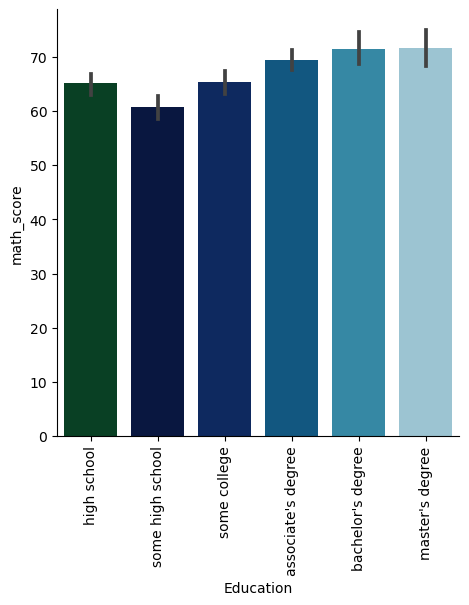

In [40]:
sns.catplot(x="Education",y="math_score",data=df,palette="ocean",kind="bar")
plt.xticks(rotation=90)
plt.show()


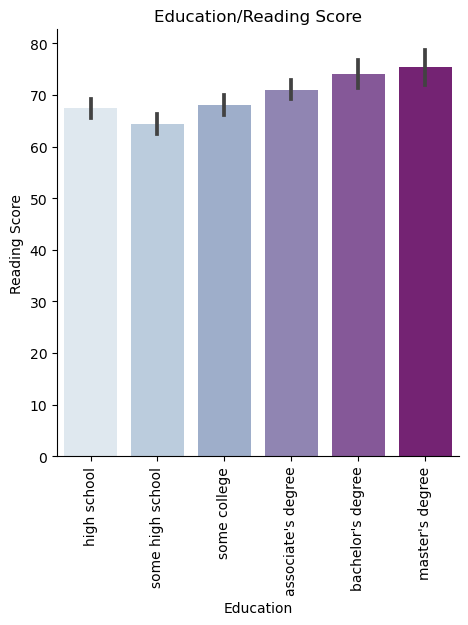

In [43]:
sns.catplot(data=df,x="Education",y="reading_score",kind="bar",palette="BuPu")
plt.xticks(rotation=90)
plt.xlabel("Education")
plt.ylabel("Reading Score")
plt.title("Education/Reading Score")
plt.show()

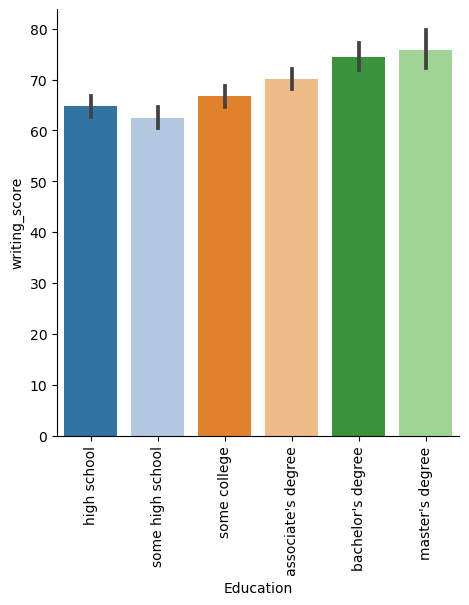

In [44]:
sns.catplot(data=df,x="Education",y="writing_score",kind="bar",palette="tab20")
plt.xticks(rotation=90)
plt.show()

In [45]:
data1=df['race_ethnicity'].head()
data2=df['math_score'].head()
conc_data_col=pd.concat([data1,data2],axis=1)
conc_data_col

,race_ethnicity,math_score
0,group A,67
1,group D,40
2,group E,59
3,group B,77
4,group E,78


### race_ethnicity-math_score
       
### race_ethnicity-reading_score
         
### race_ethnicity-writing_score

In [47]:
a=df.groupby(["race_ethnicity"])["math_score"].mean()
a

race_ethnicity
group A    65.215190
group B    63.170732
group C    63.130031
group D    69.267176
group E    74.465649
Name: math_score, dtype: float64

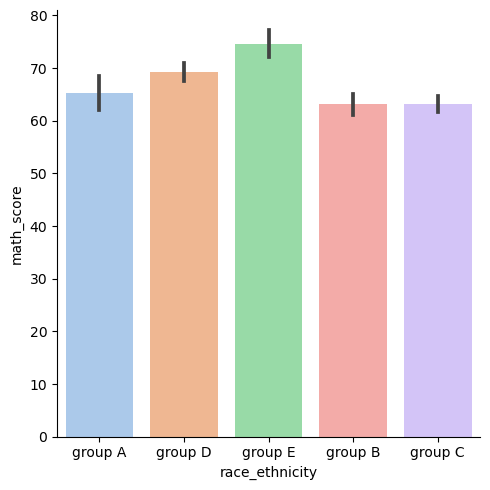

In [48]:
sns.catplot(kind="bar",x="race_ethnicity",y="math_score",data=df,palette="pastel")
plt.show()

In [49]:

df.groupby(["race_ethnicity"])["reading_score"].mean()

race_ethnicity
group A    68.556962
group B    67.102439
group C    66.383901
group D    72.087786
group E    72.526718
Name: reading_score, dtype: float64

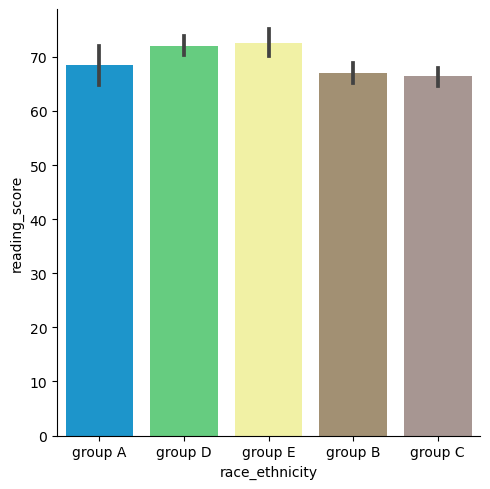

In [51]:
sns.catplot(kind="bar",x="race_ethnicity",y="reading_score",data=df,palette="terrain")
plt.show()

In [52]:
df.groupby(["race_ethnicity"])["writing_score"].mean()

race_ethnicity
group A    66.974684
group B    65.736585
group C    64.523220
group D    72.259542
group E    70.213740
Name: writing_score, dtype: float64

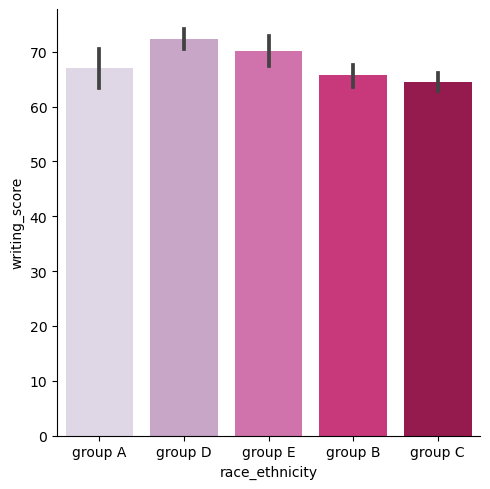

In [53]:
sns.catplot(kind="bar",x="race_ethnicity",y="writing_score",data=df,palette="PuRd")
plt.show()

### Data PreProcessing

In [54]:
print(df['gender'].unique())

['male' 'female']


In [55]:
print(df['race_ethnicity'].unique())

['group A' 'group D' 'group E' 'group B' 'group C']


In [56]:
print(df['Education'].unique())

['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]


In [57]:
print(df['lunch'].unique())

['standard' 'free/reduced']


In [58]:
print(df['Education'].value_counts())

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
data=df
data['gender']=le.fit_transform(data['gender'])
data['lunch']=le.fit_transform(data['lunch'])

In [61]:
data=pd.get_dummies(data)

In [62]:
data

,gender,lunch,math_score,reading_score,writing_score,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,Education_associate's degree,Education_bachelor's degree,Education_high school,Education_master's degree,Education_some college,Education_some high school,test_preparation_course_completed,test_preparation_course_none
0,1,1,67,67,63,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,40,59,55,0,0,0,1,0,0,0,0,0,0,1,0,1
2,1,0,59,60,50,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1,1,77,78,68,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,1,78,73,68,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,73,70,65,0,0,1,0,0,0,0,1,0,0,0,0,1
996,1,0,85,91,92,0,0,0,1,0,1,0,0,0,0,0,1,0
997,0,0,32,35,41,0,0,1,0,0,0,0,0,0,0,1,0,1
998,0,1,73,74,82,0,0,1,0,0,0,0,0,0,1,0,0,1


### Creating a new dependent feature to predict the total scores using ML model

In [63]:
data['total_scores'] = data['math_score']+data['reading_score']+data['writing_score']
data.head()

,gender,lunch,math_score,reading_score,writing_score,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,Education_associate's degree,Education_bachelor's degree,Education_high school,Education_master's degree,Education_some college,Education_some high school,test_preparation_course_completed,test_preparation_course_none,total_scores
0,1,1,67,67,63,1,0,0,0,0,0,0,1,0,0,0,1,0,197
1,0,0,40,59,55,0,0,0,1,0,0,0,0,0,0,1,0,1,154
2,1,0,59,60,50,0,0,0,0,1,0,0,0,0,1,0,0,1,169
3,1,1,77,78,68,0,1,0,0,0,0,0,1,0,0,0,0,1,223
4,1,1,78,73,68,0,0,0,0,1,1,0,0,0,0,0,1,0,219


<AxesSubplot:xlabel='total_scores'>

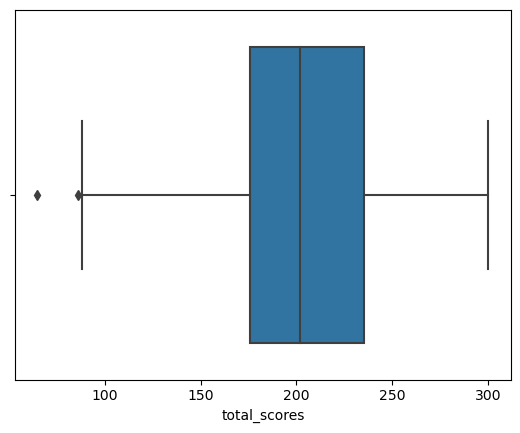

In [65]:
sns.boxplot(data['total_scores'])

### We can see that the total scores distributed between the range of 170 - 240 mostly..
### But the range extends upto the range of 80-300.
### Also there are some outliers which shows that there are some students who did not perform well on other scores

### Splitting the dataset into independent and dependent variables

In [66]:
X=data.drop(['total_scores'],axis=1)
y=data['total_scores']

In [67]:
X

,gender,lunch,math_score,reading_score,writing_score,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,Education_associate's degree,Education_bachelor's degree,Education_high school,Education_master's degree,Education_some college,Education_some high school,test_preparation_course_completed,test_preparation_course_none
0,1,1,67,67,63,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,40,59,55,0,0,0,1,0,0,0,0,0,0,1,0,1
2,1,0,59,60,50,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1,1,77,78,68,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,1,78,73,68,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,73,70,65,0,0,1,0,0,0,0,1,0,0,0,0,1
996,1,0,85,91,92,0,0,0,1,0,1,0,0,0,0,0,1,0
997,0,0,32,35,41,0,0,1,0,0,0,0,0,0,0,1,0,1
998,0,1,73,74,82,0,0,1,0,0,0,0,0,0,1,0,0,1


In [68]:
y

0      197
1      154
2      169
3      223
4      219
      ... 
995    208
996    268
997    108
998    229
999    187
Name: total_scores, Length: 1000, dtype: int64

### Splitting data into train and test

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [70]:
print(X_train.shape,y_train.shape)

(700, 18) (700,)


In [71]:
print(X_test.shape,y_test.shape)

(300, 18) (300,)


## MODELLING

### Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor(max_depth=7)
dec_reg

DecisionTreeRegressor(max_depth=7)

In [73]:
dec_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [74]:
y_pred_dec_reg=dec_reg.predict(X_test)


### SCORE

In [75]:
print("Score on test_Data: ",dec_reg.score(X_test,y_test))
print("Score on training_Data: ",dec_reg.score(X_train,y_train))

Score on test_Data:  0.980666289363987
Score on training_Data:  0.9961712465621542


In [76]:
depth=np.arange(1,20)
mae=[]
for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k,min_samples_leaf=5)
    reg_tree.fit(X_test,y_test)
    y_pred=reg_tree.predict(X_test)
    mae.append(np.mean(np.abs(y_test-y_pred)))

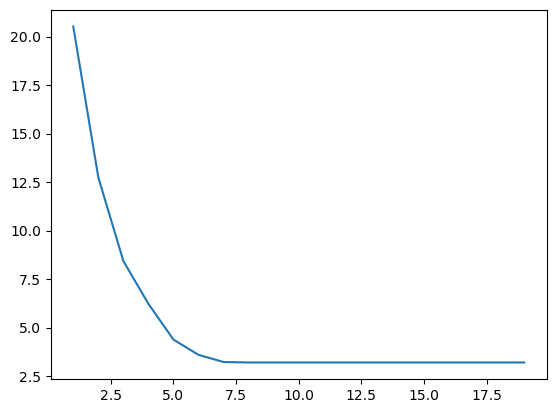

In [77]:
plt.plot(depth,np.array(mae))
plt.show()

In [78]:
#MAE
np.mean(np.abs(y_test-y_pred))

3.200650793650794

In [80]:
#MSE
np.mean((y_test-y_pred)**2)

20.1118015873016

In [82]:
#RMSE
np.sqrt(np.mean(y_test-y_pred)**2)

2.7948014273230606e-15

In [83]:
#MAPE
np.mean(np.abs(y_test-y_pred)/y_test)*100

1.7841088832295355

I tried different depths for the decision tree regressor.. Found that 7 and 8 gives the best accuracy..!

### Using K-Neighbors Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg

KNeighborsRegressor(n_neighbors=2)

In [86]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [87]:
y_pred_knn_reg=knn_reg.predict(X_train)


In [88]:
print("Score on Test Data : ",knn_reg.score(X_test,y_test))
print("Score on Training Data : ",knn_reg.score(X_train,y_train))

Score on Test Data :  0.9975583145076816
Score on Training Data :  0.9990248723427411


In [89]:
depth = np.arange(1,20)
mae=[]
for k in depth:
    knn_reg=KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_test,y_test)
    y_pred=knn_reg.predict(X_test)
    mae.append(np.mean(np.abs(y_test-y_pred)))

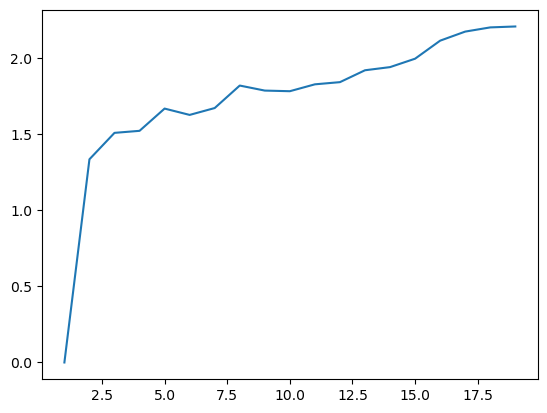

In [90]:
plt.plot(depth,np.array(mae))
plt.show()

I tried different depths for the KNN.. Found that 2 gives the best accuracy..!

OUT OF THESE TWO MODELS KNN MODEL ACCURACY IS HIGHER .SO,KNN IS THE BEST MODEL FOR THIS DATA.